<a href="https://colab.research.google.com/github/pankaj2507/ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [ ]:
# !pip install tensorflow
import tensorflow
print(tensorflow.__version__)

2.17.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv("/content/sample_data/Churn_Modelling.csv")

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]>

In [ ]:
# divide dataset into independent and dependent feature
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
# feature engineering
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x["Gender"],drop_first=True)

In [ ]:
x=x.drop(["Geography","Gender"],axis=1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
x=pd.concat([x,geography,gender],axis=1)

In [ ]:
#spliting the dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_train.shape

(8000, 11)

# New Section

In [ ]:
# part 2 lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# Lets initialized  the ANN
classifier=Sequential()


In [ ]:
# Adding input layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
# adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
# output layer
classifier.add(Dense(1,activation='sigmoid'))
classifier.add(Dropout(0.3))

In [ ]:
# optimizer manual initialize
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7258 - loss: 1.3713 - val_accuracy: 0.8417 - val_loss: 0.3843
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8279 - loss: 1.2635 - val_accuracy: 0.7955 - val_loss: 0.5216
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7936 - loss: 1.2996 - val_accuracy: 0.7955 - val_loss: 0.5233
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8020 - loss: 1.3464 - val_accuracy: 0.7955 - val_loss: 0.5220
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7871 - loss: 1.5001 - val_accuracy: 0.7955 - val_loss: 0.5249
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8035 - loss: 1.2647 - val_accuracy: 0.7955 - val_loss: 0.5175
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7947 - loss: 1.3588 - val_accuracy: 0.7955 - val_loss: 0.5190
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7955 - loss: 1.4005 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

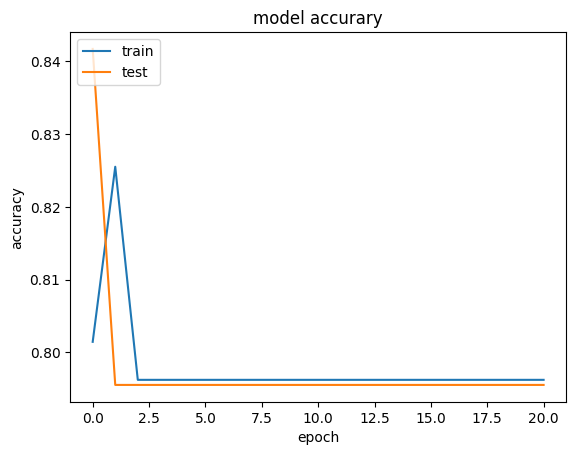

In [ ]:
# summary of hostory
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accurary')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train','test'],loc='upper left')
plt.show()


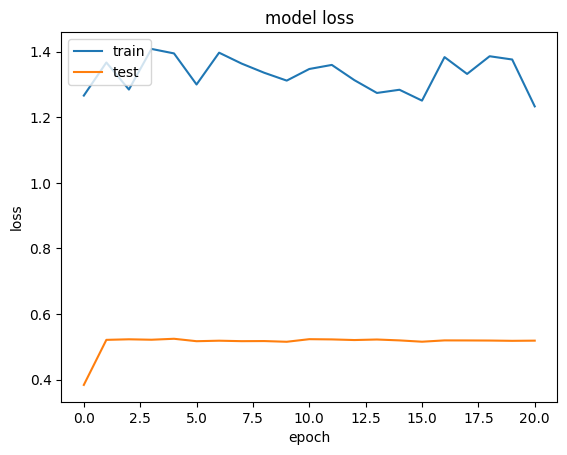

In [ ]:
# summary of hostory
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
# part 3 making the predictions and evaluating the model
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# make confusion metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.7975

In [ ]:
# get the weights
classifier.get_weights()

[array([[-0.36658213,  0.4037606 , -0.42935136,  4.007356  , -0.00978718,
         -4.652088  , -0.11385274,  0.20116805, -1.7077695 , -1.1982652 ,
         -0.6618597 ],
        [ 1.1834468 , -5.7947164 ,  0.33561623, -1.7486732 , -8.102506  ,
         -6.948528  , -9.381586  , -7.683913  ,  0.28477785,  4.0651174 ,
         -6.251528  ],
        [-0.27593446,  2.3750455 ,  1.382453  , -1.692513  , -1.9284886 ,
         -1.12812   ,  0.6555706 ,  0.7896715 , -1.3549525 , -0.737851  ,
          1.9833643 ],
        [ 2.0193315 , -6.1299877 , -6.9381747 , -2.8993025 , -0.34300348,
          1.3175844 ,  1.2978499 , -0.91989994, -3.321814  , -1.5872976 ,
         -0.1139415 ],
        [ 6.851481  , -3.8039045 ,  3.1608763 ,  2.1743562 , -3.6288898 ,
          2.0170045 ,  2.494571  ,  0.18083669, -7.12779   , -0.97822094,
          0.6537665 ],
        [-1.3444682 , -1.0603977 , -0.68002826, -1.0339816 ,  0.5048654 ,
         -0.83439016,  1.1978828 , -0.5156115 , -0.4234276 , -0.0761062